In [1]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import seaborn as sns
from matplotlib import pyplot as plt

/kaggle/input/kuslar/processed_dataset.csv
/kaggle/input/kuslar/Iris.csv
/kaggle/input/kuslar/data_with_nans.csv


## VERİYİ HAZIRLAMA
Gereksiz kolonların düşürülmesi, verilerden çıkarım yapılması ve bu çıkarımların verilere aktarılması bir süreç. Bu süreç, veriyi yapay zeka adına hazırlamak olarak nitelendiriliyor.

In [2]:
data = pd.read_csv("/kaggle/input/kuslar/data_with_nans.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     170 non-null    int64  
 1   Id             170 non-null    int64  
 2   SepalLengthCm  167 non-null    float64
 3   SepalWidthCm   169 non-null    float64
 4   PetalLengthCm  166 non-null    float64
 5   PetalWidthCm   168 non-null    float64
 6   Species        170 non-null    object 
dtypes: float64(4), int64(2), object(1)
memory usage: 9.4+ KB


In [3]:
data = data.drop(columns="Unnamed: 0") #gereksiz index düşürüldü
data.describe() #bizim veri setimiz özelinde bu şu an gereksiz fakat gösterdim. zira öncelikle çiçekleri türlerine göre gruplandırmamız ve sonrasında
#bakmamız mantıklı olacaktır

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,170.000000,167.000000,169.000000,166.000000,168.000000
mean,84.500000,5.826347,3.072781,3.707229,1.180357
std,49.218899,0.827189,0.447578,1.789382,0.765049
min,0.000000,4.300000,2.000000,1.000000,0.100000
25%,42.250000,5.100000,2.800000,1.500000,0.300000
50%,84.500000,5.800000,3.000000,4.300000,1.300000
75%,126.750000,6.400000,3.400000,5.100000,1.800000
max,169.000000,7.900000,4.400000,6.900000,2.500000


In [4]:
data.groupby("Species").agg(["min","max","std","mean"]) #üç türde de ciddi farklılıklar olduğunu görebilmek adına bunu yaptım.

Id                        SepalLengthCm                 \
                 min  max        std   mean           min  max       std   
Species                                                                    
Iris-setosa        0   59  17.464249   29.5           4.3  6.9  0.429014   
Iris-versicolor   60  113  15.732133   86.5           4.9  7.0  0.516189   
Iris-virginica   114  169  16.309506  141.5           4.9  7.9  0.650025   

                          SepalWidthCm                          PetalLengthCm  \
                     mean          min  max       std      mean           min   
Species                                                                         
Iris-setosa      5.034483          2.3  4.4  0.390709  3.389831           1.0   
Iris-versicolor  5.932075          2.0  4.4  0.382355  2.805556           1.5   
Iris-virginica   6.546429          2.2  3.9  0.355203  2.996429           1.3   

                                         PetalWidthCm                           
                 max       std      mean          min  max       std      mean  
Species                                                                         
Iris-setosa      5.4  0.639570  1.572414          0.1  2.1  0.295950  0.300000  
Iris-versicolor  5.1  0.623167  4.190385          0.4  1.8  0.235049  1.314815  
Iris-virginica   6.9  0.795195  5.469643          0.4  2.5  0.353215  1.992727

### NaN Değerler

In [5]:
data.isna().sum()

Id               0
SepalLengthCm    3
SepalWidthCm     1
PetalLengthCm    4
PetalWidthCm     2
Species          0
dtype: int64

Boş verileri doldurmak ya da direkt olarak atmak gibi iki yaklaşım var. Bu durum veriden veriye değişiyor, bizim veri setimiz örneğinde elimizde kuvvetli miktarda referans veri olduğu için dolduracağız.
Bizim örneğimiz için ortalama ile dolduracağız. Farklı doldurma yöntemleri de var.

In [6]:
data.groupby("Species").sum() #grupları yeniden görüyorum

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,1770,292.0,200.0,91.2,17.7
Iris-versicolor,4671,314.4,151.5,217.9,71.0
Iris-virginica,7924,366.6,167.8,306.3,109.6


In [7]:
dataC = data.copy()#orijinal veriye olur da bakmam gerekirse diye kopyalama yaptım.
species_groups = dataC.groupby("Species") #aynı türlerin ortalamasını alıyorum ki farklı türün ortalaması araya karışıp veriyi saptırmasın.

for setosa in species_groups.get_group("Iris-setosa").columns[1:5]:
    dataC.loc[dataC["Species"]=="Iris-setosa", setosa] = species_groups.get_group("Iris-setosa")[setosa].fillna(value=species_groups.get_group("Iris-setosa")[setosa].mean())
for versicolor in species_groups.get_group("Iris-versicolor").columns[1:5]:
    dataC.loc[dataC["Species"]=="Iris-versicolor", versicolor] = species_groups.get_group("Iris-versicolor")[versicolor].fillna(value=species_groups.get_group("Iris-versicolor")[versicolor].mean())
for virginica in species_groups.get_group("Iris-virginica").columns[1:5]:
    dataC.loc[dataC["Species"]=="Iris-virginica", virginica] = species_groups.get_group("Iris-virginica")[virginica].fillna(value=species_groups.get_group("Iris-virginica")[virginica].mean())


In [8]:
dataC.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Aykırı Değerler

<AxesSubplot:xlabel='Id', ylabel='SepalLengthCm'>

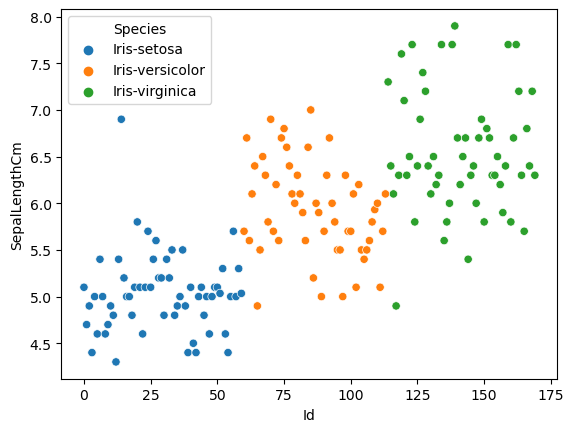

In [9]:
sns.scatterplot(data=dataC, x="Id", y="SepalLengthCm", hue="Species") #çok net görülüyor yok tür uzunluğu olarak virginica>versicolor>setosa şeklinde
#setosa kısmında bir aykırı değer var, bu değer ya yanlış girilmiş ya da setosa yerine versicolor ya da verginica'ya ait. buna biz karar vereceğiz.
#aynı şekilde versicolor kısmına kaçan bir verginica da var, bu değerin ya mavi ya da turuncu olması gerekiyor.
#aykırı değerlerin temizlenmesi çok önemli

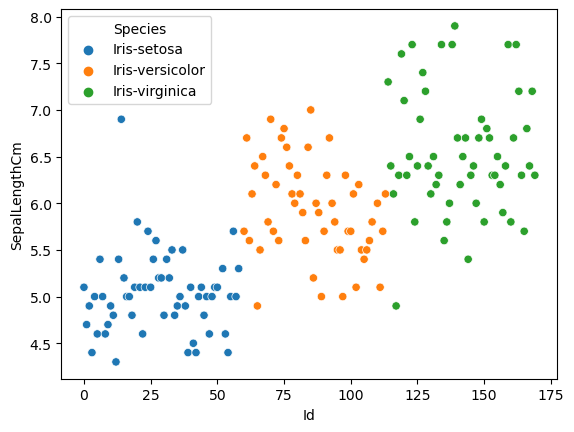

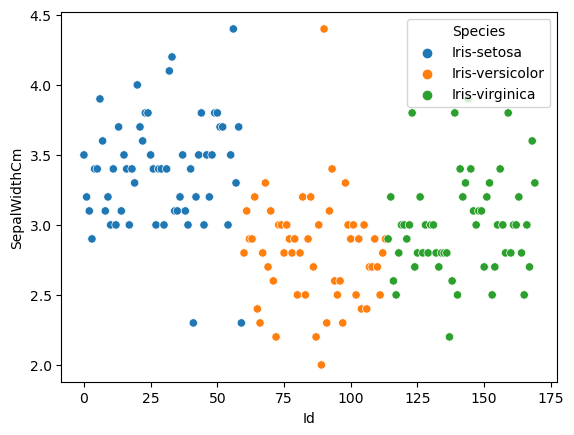

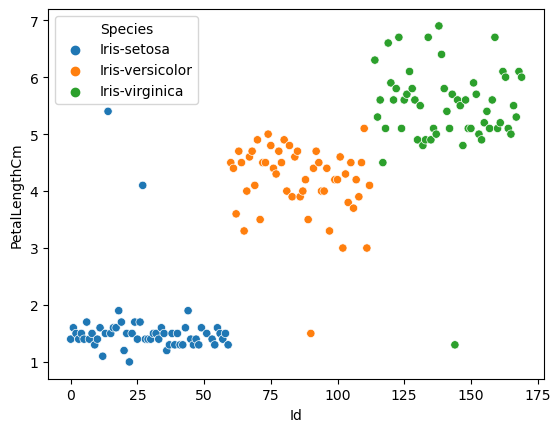

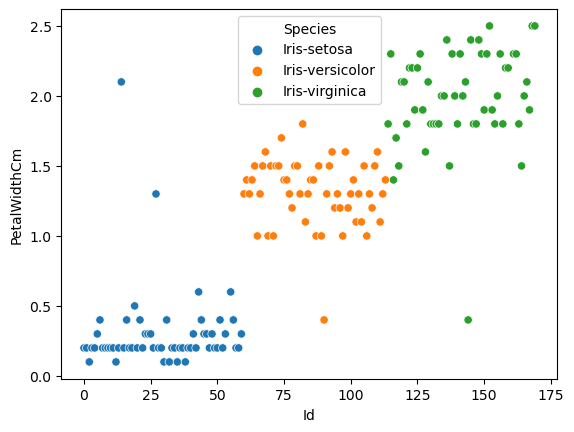

In [10]:
#bazen ciddi manada büyük veri setleri geliyor ve çok fazla column oluyor. bu noktada tek tek columnları yazmamak için:
for columns in dataC.columns[1:5]:
    sns.scatterplot(data=data, x="Id", y=columns, hue="Species")
    plt.show()#her bir sütunu ayrı ayrı göstermesi için bunu girdim

Bu görsellerde aykırı değerler çok daha belli oluyor. Bu aykırı değerlerin temizlenmesi çok önemli.

#### Standart Sapma Yöntemi

3 sigma, 3 standart sapma olarak da geçer. Normal dağılımda ortalamanın x olduğunu hayal edelim, x+standart sapma ilk leveldır ve biz burada x+3standart sapma kullanacağız. Bu oran verinin yaklaşık %99.7'lik hacmini temsil eder. Bu yöntem genelde işe yarar fakat her zaman değil.

![normal distribution %99.7 görseli](https://builtin.com/sites/www.builtin.com/files/styles/ckeditor_optimize/public/inline-images/1_empirical-rule.jpg)

In [11]:
setosa=dataC.loc[dataC["Species"]=="Iris-setosa"]
versicolor=dataC.loc[dataC["Species"]=="Iris-versicolor"]
virginica=dataC.loc[dataC["Species"]=="Iris-virginica"]

In [12]:
for species in dataC["Species"].unique():
    species_specialized=dataC.loc[dataC["Species"]==species]
    for column in dataC.columns[1:5]:
        species_specialized_std = species_specialized[column].std()
        species_specialized_mean = species_specialized[column].mean()
        threestd_plus = species_specialized_mean + (3 * species_specialized_std)
        threestd_minus = species_specialized_mean - (3 * species_specialized_std)
        aykiri_degerler= species_specialized[(species_specialized[column] > threestd_plus) | (species_specialized[column] < threestd_minus)].index
        for index in aykiri_degerler:#tekrar loop aldım çünkü aynı değerleri yeniden göremeyince key error veriyor, fakat erro
            #yerine sonraki indexe geçmesini istiyoruz
            try:
                dataC.drop(index=index, inplace=True)
            except KeyError:
                pass

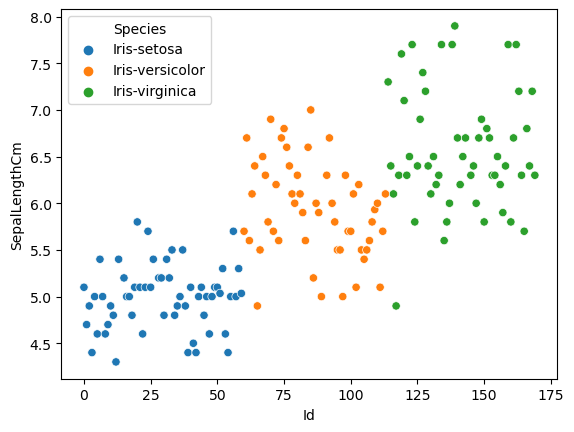

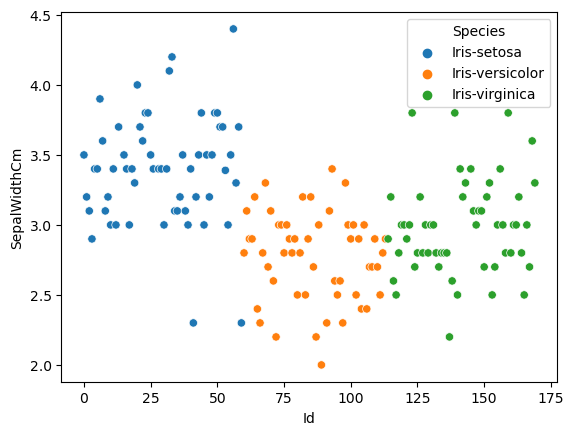

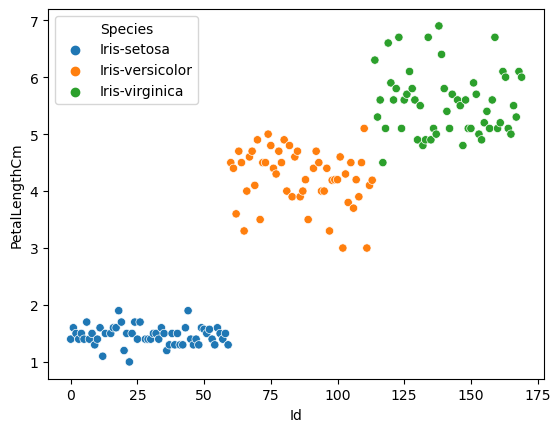

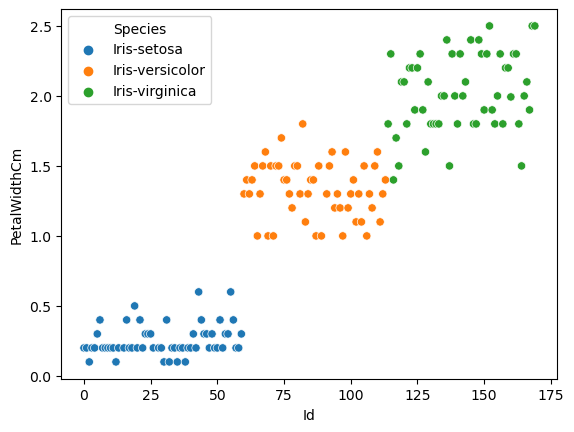

In [13]:
#bakalım aykırı değerler ne olmuş
for columns in dataC.columns[1:5]:
    sns.scatterplot(data=dataC, x="Id", y=columns, hue="Species")
    plt.show()

#### IQR - QUANTILE 

Farklı bir yöntem, boxplot çizdirilerek medyana göre belirlenmiş max ve min kısımlarının üstlerindeki değerleri bulur ve atar.

![boxplot outlier görseli](https://miro.medium.com/max/1400/0*Rpd3tQj-kUpwObeA)

In [14]:
for species in dataC["Species"].unique():
    species_specialized=dataC.loc[dataC["Species"]==species]
    for column in dataC.columns[1:5]:
        species_specialized_q1 = species_specialized[column].quantile(0.25)
        species_specialized_q3 = species_specialized[column].quantile(0.75)
        species_specialized_iqr= species_specialized_q3 - species_specialized_q1
        species_specialized_min = species_specialized_q1 - (1.5 * species_specialized_iqr)
        species_specialized_max = species_specialized_q3 + (1.5 * species_specialized_iqr)
        aykiri_degerler= species_specialized[(species_specialized[column] > species_specialized_max) | (species_specialized[column] < species_specialized_min)].index
        for index in aykiri_degerler:
            try:
                dataC.drop(index=index, inplace=True)
            except KeyError:
                pass

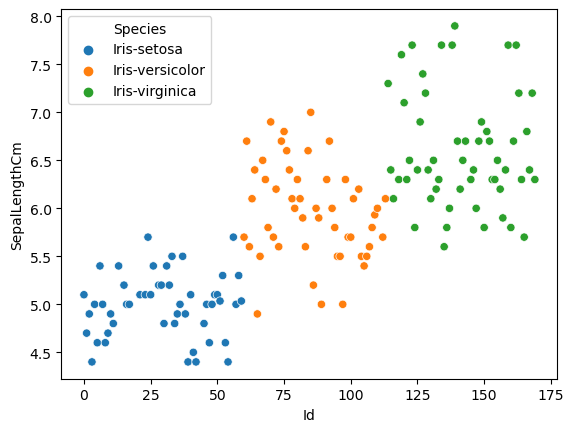

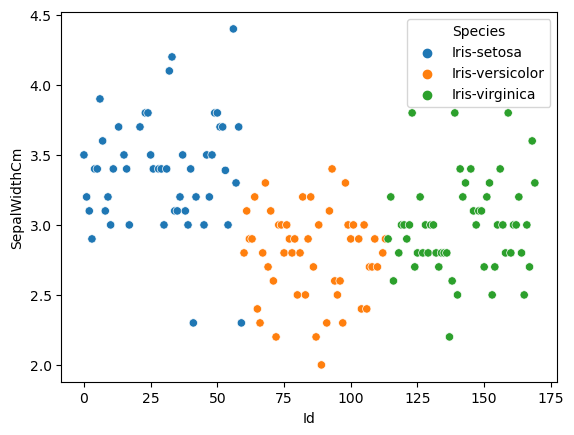

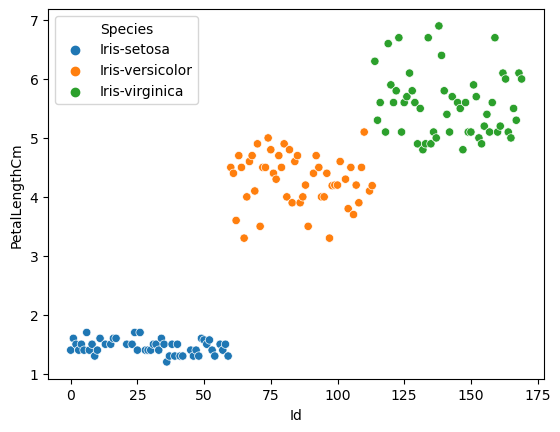

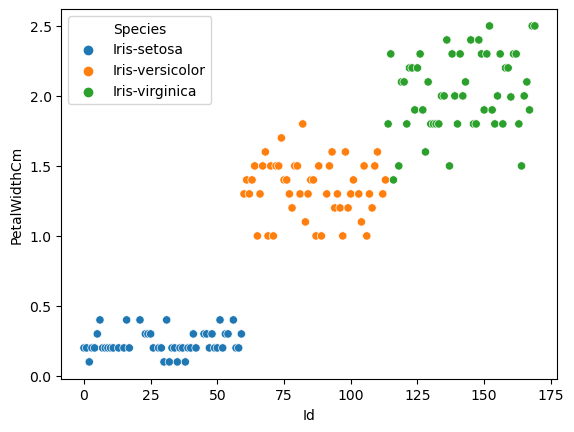

In [15]:
#yeniden bakış
for columns in dataC.columns[1:5]:
    sns.scatterplot(data=dataC, x="Id", y=columns, hue="Species")
    plt.show()

Genellikle gerçek hayat kodlamalarında veri temizliği bu kadar kısa ve net sürmez, aşırı üstün körü bir anlatım ve aşırı basit bir veri örneğimiz var. Buradaki işimiz bitti, modele geçebiliriz.

In [16]:
dataC.to_csv("dataC.csv")#son olarak verimi kaydettim.

## MODEL OLUŞTURMA

İş her zaman encoding ile başlar. Makinenin str değerlerini bir numaraya eşlemesi gerekir. Örneğin elma, armut, muz için 1, 2, 3 atamalarını yaparız ve böylece makine 1'in elma, 2'nin armut ve 3'ün muz olduğunu anlar. Bunun için LabelEncoding ve OneHotEncoding adlı iki metod var. İkisinin de avantajları ve dezavantajları mevcut, veri tipine ve veri yapısına göre bu yöntemler değişmektedirler.

![one hot encoding and label encoding](https://miro.medium.com/max/1200/0*T5jaa2othYfXZX9W.)

**One-hot encoding:** Kategorik değişkenlerin ikili vektörlere dönüştürülmesi için kullanılır. Bu yöntem, her kategoriyi ayrı bir özellik olarak temsil eder ve her özelliğin değeri 0 veya 1'dir. One-hot encoding, özellikler arasında eşit uzaklık sağlar ve özelliklerin birbirleriyle etkileşimi olmadığı için çoklu regresyon modellerinde kullanılması önerilir.

**Örnekler:**

Bir meyve veri setinde, "elma", "armut" ve "portakal" gibi kategorik özellikler varsa, her biri için ayrı bir özellik oluşturulabilir. Örneğin, "elma" özelliği için bir özellik vektörü [1,0,0] olacaktır.

Bir müşteri veri setinde, "erkek" ve "kadın" gibi cinsiyet kategorileri varsa, her bir müşteri için ayrı bir özellik oluşturulabilir. Örneğin, "erkek" özelliği için bir özellik vektörü [1,0] olacaktır.

**Label encoding**: Kategorik değişkenleri sıralı sayısal değerlere dönüştürmek için kullanılır. Bu yöntem, sınıflandırma modellerinde kullanılmak için uygundur ve sınıflar arasında doğrusal bir ilişki olduğunu varsayar.

**Örnekler:**

Bir müşteri veri setinde, "yüksek", "orta" ve "düşük" gibi gelir kategorileri varsa, bu kategoriler sıralı bir şekilde sayısal değerlere dönüştürülebilir. Örneğin, "yüksek" için 3, "orta" için 2 ve "düşük" için 1 sayısal değerleri atanabilir.

Bir derecelendirme veri setinde, "çok iyi", "iyi", "orta", "kötü" ve "çok kötü" gibi kategoriler varsa, bu kategoriler sıralı bir şekilde sayısal değerlere dönüştürülebilir. Örneğin, "çok iyi" için 5, "kötü" için 2 sayısal değerleri atanabilir.

Özetle, **one-hot encoding, sınıflar arasında eşit uzaklık ve etkileşimsiz özellikler** gerektiren çoklu regresyon modellerinde kullanım için uygunken, **label encoding, sınıflar arasında doğrusal bir ilişki** varsayarak sınıflandırma modellerinde kullanım için daha uygundur. Ancak, label encoding kategorik verilerin sayısal formata dönüştürülmesinde bir dezavantaj sunar. Özellikle, sayısal değerler sıralı olarak atanırsa, modelde yanıltıcı sonuçlar üretilebilir. Örneğin, "orta" ile "düşük" arasında doğrusal bir ilişki olduğu varsayıldığında, "düşük" ile "yüksek" arasında da aynı doğrusal ilişkinin olduğu varsayılabilir ki bu gerçek hayatta böyle olmayabilir. Bu durumda, one-hot encoding yöntemi daha doğru sonuçlar üretebilir.

In [17]:
dataC = dataC.drop(columns="Id")#ihtiyacım olmadığı için attım

In [18]:
from sklearn.preprocessing import OneHotEncoder #ben onehotencoder kullanacağım.
from sklearn.preprocessing import LabelEncoder #fakat bilmek adına iki encodingi de yapacağım.
le = LabelEncoder()
oe = OneHotEncoder()
dataC = dataC.reset_index(drop=True) #veride düşürme işlemleri yaparken indexin de içinden geçtiğimiz için reset atıyoruz
dataC_le = dataC.copy() #le encoding datam bu olacak
dataC_oe = dataC.copy() #oe encoding datam bu olacak

In [19]:
#label encoding işlemi
dataC_le["Species"] = le.fit_transform(dataC["Species"])

In [20]:
#onehot encoding işlemi
unique_species = dataC['Species'].unique() #neye göre sınıflandıracağımı alıyorum ve kaydediyorum.
categories = [unique_species]
species_encoded = oe.fit_transform(dataC['Species'].astype('category').cat.codes.values.reshape(-1, 1)) #onehot encoding işlemi
#encodda çıkanları dataframe olarak kaydediyorum, encoding sonuçlarını array olarak değer veriyorum, column isimlerini
#de gene kategori adlarından veriyorum
species_encoded_df = pd.DataFrame(species_encoded.toarray(), columns=oe.get_feature_names_out(categories))
#onehot encoding yapılmış sütunları 'dataC' veri çerçevesine ekliyorum, eklerken "species" kısmını düşürmeyi ihmal etmiyorum
dataC_oe = pd.concat([dataC.drop('Species', axis=1), species_encoded_df], axis=1)


In [21]:
#ufak kontroller
dataC_le.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [22]:
dataC_oe.isna().sum()

SepalLengthCm                                           0
SepalWidthCm                                            0
PetalLengthCm                                           0
PetalWidthCm                                            0
(Iris-setosa_0, Iris-versicolor_0, Iris-virginica_0)    0
(Iris-setosa_1, Iris-versicolor_1, Iris-virginica_1)    0
(Iris-setosa_2, Iris-versicolor_2, Iris-virginica_2)    0
dtype: int64

In [23]:
dataC_le.dtypes #herhangi bir object ya da string yok, sadece float ve int var, olması gerektiği gibi

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species            int64
dtype: object

In [24]:
dataC_oe.dtypes #herhangi bir object ya da string yok, sadece float ve int var, olması gerektiği gibi

SepalLengthCm                                           float64
SepalWidthCm                                            float64
PetalLengthCm                                           float64
PetalWidthCm                                            float64
(Iris-setosa_0, Iris-versicolor_0, Iris-virginica_0)    float64
(Iris-setosa_1, Iris-versicolor_1, Iris-virginica_1)    float64
(Iris-setosa_2, Iris-versicolor_2, Iris-virginica_2)    float64
dtype: object

### train-test-split

"Train-test-split", bir makine öğrenimi modelini eğitmek ve test etmek için kullanılan bir yöntemdir. Bu yöntem, veri kümesini iki alt küme olan eğitim verisi ve test verisi olarak ayırarak çalışır. Eğitim verisi, modelin öğrenmek için kullandığı verilerdir, test verisi ise modelin performansını değerlendirmek için kullanılan verilerdir.

İlk adım olarak, verilerinizin girdilerini ve hedef çıktılarını ayırmak için X ve y değişkenlerini tanımlayın. Girdiler, makine öğrenimi modelinizin öğreneceği özelliklerdir, hedef çıktılar ise modelin tahmin etmeye çalışacağı sonuçlardır.

Daha sonra, "train_test_split" fonksiyonunu kullanarak verilerinizi rastgele eğitim ve test alt kümelerine ayırın. Bu fonksiyon, eğitim ve test verilerinin oranını belirlemenize ve rastgele bir bölümleme yapmanıza olanak tanır.

Son olarak, eğitim verilerinizi kullanarak bir makine öğrenimi modeli oluşturun ve test verilerini kullanarak modelinizin performansını değerlendirin.

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
#açıkça belli ki eğitim verilerim, yani x, species dışındaki her şey.
#hedefim ise species'i bulmak, yani çiçeklerin türünü bulmak.
train = dataC_le.loc[:,dataC_le.columns != "Species"] #species dışındaki her şeyi seçiyorum
test = dataC_le.loc[:,dataC_le.columns == "Species"] #speciesi seçiyorum, hedefimi
split = 0.2 #veriyi eğitim ve test olarak rastgele yüzde kaç bölümek istediğimizi soruyor, ben %20 dedim.
#fakat %20 gerçekten çok fazla. eğer elimizde çok fazla veri varsa, örneğin milyonluk, bu rakam 0.02'ye bile düşebilir.

In [27]:
x_train, x_test, y_train, y_test = train_test_split(train, test, test_size=split, random_state=3169)
#sırasıyla train,test ve spliti girdim. bunlar bize dört adet döngü sağlayacak.
#x_train = x eğitim kolonunun %80'i, çünkü %20 seçtik.
#x_test = x eğitim kolonunun %20'si, çünkü %20 seçtik.
#y_train = y test kolonunun %80'i, çünkü %20 seçtik. bizim örneğimizde species
#y_test = y test kolonunun %20'si, çünkü %20 seçtik. bizim örneğimizde species
#random state ise tohum değerini ifade eder

In [28]:
x_train.shape

(124, 4)

In [29]:
x_test.shape

(31, 4)

In [30]:
y_train.shape

(124, 1)

In [31]:
y_test.shape #boyutlar da seçimimizi kanıtlar nitelikte.

(31, 1)

In [32]:
dataC["Species"].value_counts()

Iris-virginica     54
Iris-versicolor    51
Iris-setosa        50
Name: Species, dtype: int64

### baseline modelleme
hangi modelleme metodunun kullanılacağı her zaman sorulmalı. Bu durumda, temel modelimiz yalnızca çiçek türlerini rastgele tahmin etmek veya her veri noktası için tek bir tür tahmin etmek ise, 3 farklı sınıfın eşit olarak dengelendiği için (hemen hemen eşit, asıl sayılar üstte gözükmekte) model doğruluğunun %33 veya 0,33 olmasını bekleriz.
Bu nedenle, modellerimiz en az %33 doğruluk oranını geçmelidir.